In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
train = pd.read_csv('./input/train.csv', index_col=0)  # 'PassengerId' と指定してもよい
test = pd.read_csv('./input/test.csv', index_col=0)
data = pd.concat([train, test], sort=False)
data.tail(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## 1. Check Data
### 1.1 Check for null and missing values

In [3]:
print(data.info())
print(data.isnull().sum())
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Survived    891 non-null float64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB
None
Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [4]:
# describe() の引数に include='型名' を指定することで数値型以外の統計量を計算可能
# 'O'(zeroじゃなくてオー)を指定するとobject型に適応できる
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


In [5]:
data = data.fillna(np.nan)
data.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

## 2. Feature Analysis
### 2.1 Numerical values

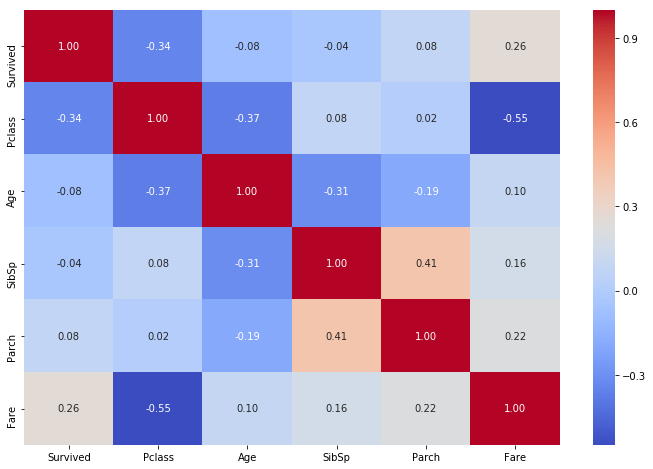

In [6]:
fig, ax = plt.subplots(figsize=(12, 8))
g = sns.heatmap(train.corr(), annot=True, fmt='.2f', cmap='coolwarm', ax=ax)

Only `Fare` (or `PClass`) seems correlating with `Survived`.

However, this does not mean the other features are important.
We induce some new features correlating with `Survived` by exploring them in details.

#### Sibsp

The number of sum of
- Sibling: brother, sister, stepbrother, stepsister
- Spouse: husband, wife (mistresses and fiancés were ignored)

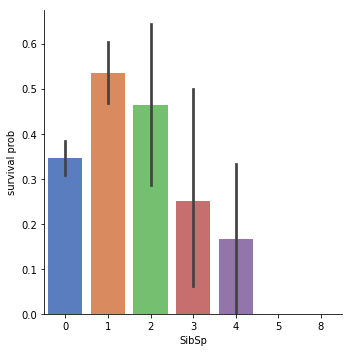

In [7]:
g = sns.catplot(x='SibSp', y='Survived', data=train, kind="bar", height=5, palette="muted")
g = g.set_ylabels('survival prob')

It seems that passengers having a lot of siblings/spouses have less chance to survive.

#### Parch

The number of sum of

- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

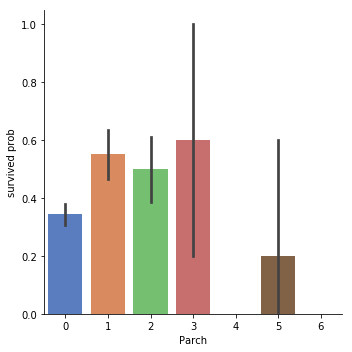

In [8]:
g = sns.catplot(x='Parch', y='Survived', data=train, kind='bar', height=5, palette='muted')
g = g.set_ylabels('survived prob')

Small families have more chance to survive.

#### Age

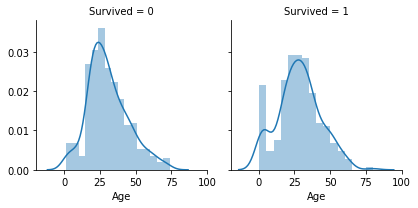

In [9]:
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.distplot, 'Age')

There is the peak of suvived youn passengers and old passengers hardly have survived.

#### Fare

We replace the one Nan value to the mean value.

In [25]:
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

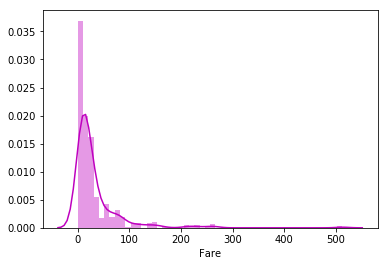

In [11]:
g = sns.distplot(train["Fare"], color="m")

### 2.2 Categorical values
#### Sex

In [12]:
train[['Survived', 'Sex']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


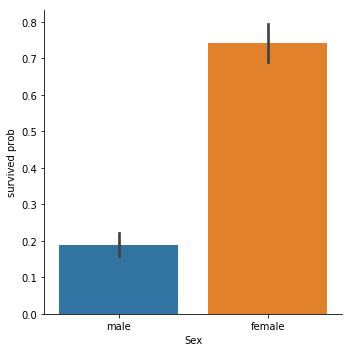

In [13]:
g = sns.catplot(x='Sex', y='Survived', data=train, kind='bar')
g = g.set_ylabels('survived prob')

It is obviout that Female have more chance to survive than Male.

So `Sex` may play very imortant role in the prediction of `Survived`.

#### PClass

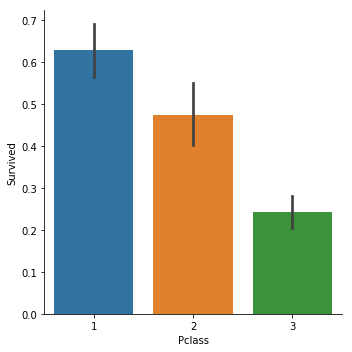

In [14]:
g = sns.catplot(x='Pclass', y='Survived', data=train, kind='bar')

Passengers of the higher class have more chance to survive.

#### Embarked

We fill two missing value with the most frequent value of `Embarked`.

In [24]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

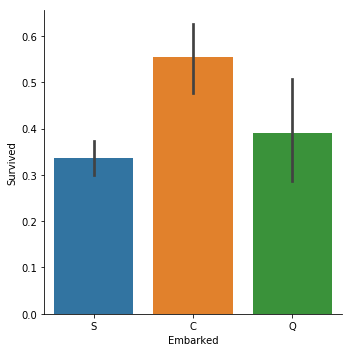

In [16]:
g = sns.catplot(x='Embarked', y='Survived', data=train, kind='bar')

It seems that passengers of class `C` have more chance to survive.
This may be because the proportion of `Pclass` 1 passengers is higher for those coming from `C`.

Let us confirm this hypothesis.

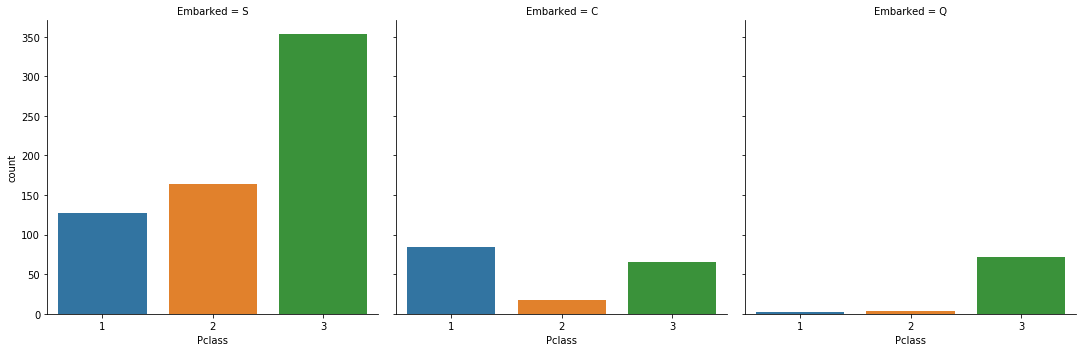

In [17]:
g = sns.catplot(x='Pclass', col='Embarked', data=train, kind='count')

It is obvious that `C` passengers are mostly in first class.

## 3. Filling Missing Values

### 3.1 Age

To predict `Age` we looked into the most correlating features with `Age`.

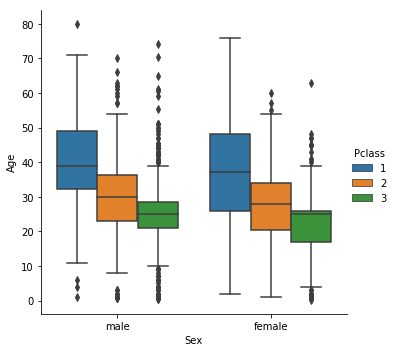

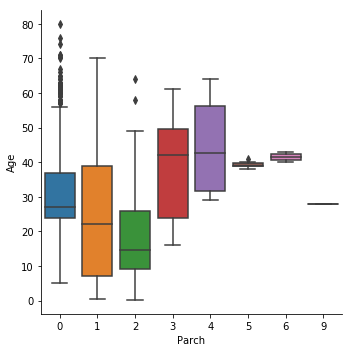

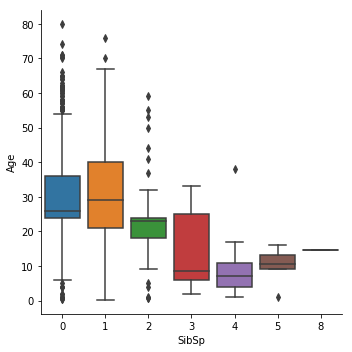

In [21]:
g = sns.catplot(y="Age", x="Sex", hue="Pclass", data=data, kind="box")
g = sns.catplot(y="Age", x="Parch", data=data, kind="box")
g = sns.catplot(y="Age", x="SibSp", data=data, kind="box")

- The first class passengers are older than the other calasses' passengers.
- The more a passenger has parents/children, the older he is.
- The more a passenger has siblings/spouses, the younger he is.

(See the above correlation matrix heatmap)

Therefore, using `Pclass`, `Parch`, and `Sibsp`, we fill `Age` with the median age of similar rows according to Pclass, Parch and SibSp.

In [26]:
## Fill Age with the median age of similar rows according to Pclass, Parch and SibSp
index_NaN_age = data['Age'][data['Age'].isnull()].index.values - 1

age_med = data['Age'].median()
for i in index_NaN_age:
    age_pred = data['Age'][((data['SibSp'] == data.iloc[i]['SibSp']) & (data['Parch'] == data.iloc[i]['Parch']) & (data['Pclass'] == data.iloc[i]['Pclass']))].median()
    if not np.isnan(age_pred):
        data['Age'].iloc[i] = age_pred
    else:
        data['Age'].iloc[i] = age_med

## 4. Feature Engineering

### 4.1 Name/Title

In [20]:
# TBA

### 4.2 Family size
From above analysis, we imagine that the larger families have more difficulties to evacuate.
So, let us add the new feature `Fsize`.

In [27]:
data['FSize'] = data['Parch'] + data['SibSp'] + 1

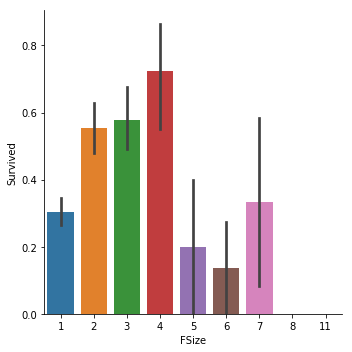

In [28]:
g = sns.catplot(x='FSize', y='Survived', data=data, kind='bar')

### 4.3 Cabin

In [122]:
data['Cabin'][data['Cabin'].notnull()].head()

PassengerId
2      C85
4     C123
7      E46
11      G6
12    C103
Name: Cabin, dtype: object

In `Cabin`, there are a lot of missing values, which shows that passengers without a cabin do not have a cabin and less chance to survive.

Let us focus only on the prefix of `Cabin`.

In [48]:
for i, item in data['Cabin'].iteritems():
    if not pd.isnull(item):
        data.loc[i, 'Cabin'] = item[0]
    else:
        data.loc[i, 'Cabin'] = 'X'

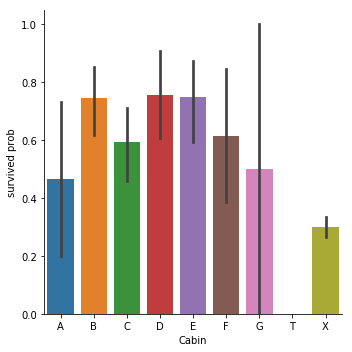

In [50]:
g = sns.catplot(x='Cabin', y='Survived', data=data, kind='bar', 
                order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'X'])
g = g.set_ylabels('survived prob')

In [51]:
data = pd.get_dummies(data, columns=['Cabin'], prefix='Cabin')
data.head(4)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FSize,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,0,0,0,0,0,0,0,1
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,0,1,0,0,0,0,0,0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,0,0,0,0,0,1
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,0,1,0,0,0,0,0,0


### 4.4 Ticket

In [123]:
data['Ticket'].head()

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: object